## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install scikit-surprise
from surprise import Reader, Dataset, accuracy
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, KFold, train_test_split
from sklearn.metrics import roc_curve, auc, mean_squared_error
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD

##Q1

##Q1a

In [2]:
# dataset_folder = '/content/drive/MyDrive/ECE219/Project3/Synthetic_Movie_Lens/'
dataset_folder = '/Users/shruti/Desktop/Winter_2022Courses/219/project3/Synthetic_Movie_Lens/'

ratings_data = pd.read_csv(dataset_folder+"ratings.csv",usecols=['userId','movieId','rating']) 
user_ID = ratings_data.pop('userId').values
movie_ID = ratings_data.pop('movieId').values
rating = ratings_data.pop('rating').values
sparsity = len(rating)/(len(set(movie_ID))*len(set(user_ID)))
print('Sparsity:',sparsity)



Sparsity: 0.016999683055613623


##Q1b

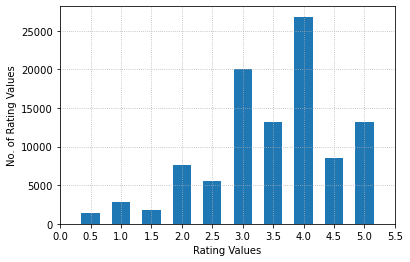

In [3]:
u, inverse = np.unique(rating, return_inverse=True)
plt.bar(u, np.bincount(inverse), width=0.30)
locs, labels = plt.xticks()  
plt.grid(linestyle=':')
plt.xticks(np.arange(0,6,0.5),rotation=0)
plt.ylabel('No. of Rating Values')
plt.xlabel('Rating Values')
plt.savefig('Q1b.png',dpi=300,bbox_inches='tight')
plt.show()

##Q1c

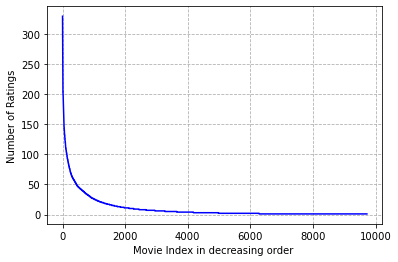

In [4]:
unique, counts = np.unique(movie_ID, return_counts=True)
plt.plot(range(1,len(unique)+1),counts[np.argsort(counts)[::-1]],linestyle='-',color='b')
plt.grid(linestyle='--')
plt.ylabel('Number of Ratings')
plt.xlabel('Movie Index in decreasing order ')
plt.savefig('Q1c.png',dpi=300,bbox_inches='tight')
plt.show()

##Q1d

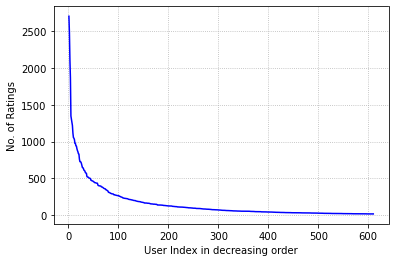

In [6]:
unique, counts = np.unique(user_ID, return_counts=True)
plt.plot(range(1,len(unique)+1),counts[np.argsort(counts)[::-1]],linestyle='-',color='b')
plt.grid(linestyle=':')
plt.ylabel('No. of Ratings')
plt.xlabel('User Index in decreasing order')
plt.savefig('Q1d.png',dpi=300,bbox_inches='tight')
plt.show()

##Q1f

In [7]:
unique_movie_ID = list(set(movie_ID))
movie_ID_list = []
variance = []
for j in range(len(unique_movie_ID)):
    indices = [i for i, x in enumerate(movie_ID) if x == unique_movie_ID[j]]
    var = np.var(np.array(rating[indices]))
    movie_ID_list.append(unique_movie_ID[j])
    variance.append(var)

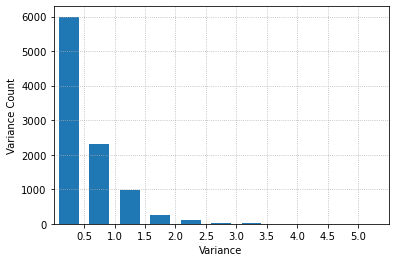

In [8]:
plt.hist(variance, bins=np.arange(0,5.5,0.5),rwidth=0.65)
plt.xticks(np.arange(0.5,5.5,0.5))
plt.xlim([0, 5.5])
plt.grid(linestyle=':')
plt.xlabel('Variance')
plt.ylabel('Variance Count')
plt.savefig('Q1f.png',dpi=300,bbox_inches='tight')
plt.show()

##Q4

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/ECE219/Project3/Synthetic_Movie_Lens/ratings.csv')
# df = df.rename(columns={'Unnamed: 0	': 'Unnamed'})
# df=df.drop('Unnamed: 0',1)
# df
# df.to_csv ('/content/drive/MyDrive/ECE219/Project3/Synthetic_Movie_Lens/ratings.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
reader = Reader(line_format='user item rating timestamp',sep=',',rating_scale=(0.5, 5),skip_lines=1)
ratings_dataset = Dataset.load_from_file(dataset_folder+"ratings.csv",reader=reader)

In [109]:
ratings_dataset


In [14]:
k = np.arange(2,102,2)
rmse = []
mae = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(KNNWithMeans(k=item,sim_options={'name':'pearson'}),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)   
    rmse.append(np.mean(res['test_rmse']))
    mae.append(np.mean(res['test_mae']))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


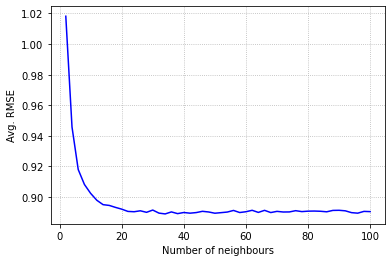

In [15]:
plt.plot(k,rmse,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q4a.png',dpi=300,bbox_inches='tight')
plt.show()

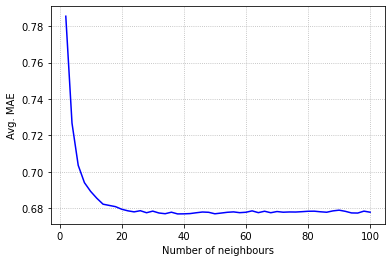

In [16]:
plt.plot(k,mae,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of neighbours')
plt.savefig('Q4b.png',dpi=300,bbox_inches='tight')
plt.show()

In [248]:
print(rmse[9])
print(mae[9])

0.8920645855117317
0.6794973016952194


##Q6

## For popular movie trim set

In [123]:
def pop_trim(data,testset):
    ref={}
    
    for j in data.raw_ratings:
        if j[1] in ref.keys():
            ref[j[1]].append(j[2])
        else:
            ref[j[1]]=[]
            ref[j[1]].append(j[2])
    pop_trimmed_set= [j for j in testset if len(ref[j[1]])>2]
    return pop_trimmed_set

def unpop_trim(data,testset):
    ref={}
    
    for j in data.raw_ratings:
        if j[1] in ref.keys():
            ref[j[1]].append(j[2])
        else:
            ref[j[1]]=[]
            ref[j[1]].append(j[2])
    unpop_trimmed_set= [j for j in testset if len(ref[j[1]])<=2]
    return unpop_trimmed_set

def highvar_trim(data,testset):
    dict_of_items={}
    
    for j in data.raw_ratings:
        if j[1] in dict_of_items.keys():
            dict_of_items[j[1]].append(j[2])
        else:
            dict_of_items[j[1]]=[]
            dict_of_items[j[1]].append(j[2])
    highvar_trimmed_set= [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
    return highvar_trimmed_set

In [112]:
k = np.arange(2,102,2)
rmse_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        
        trimmed_set= pop_trim(ratings_dataset,testset)
#         trim_list = []
#         unique, counts = np.unique([row[1] for row in testset], return_counts=True)
#         for i in range(len(counts)):
#             if(counts[i]<=2):
#                 trim_list.append(unique[i])
#         trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_pop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


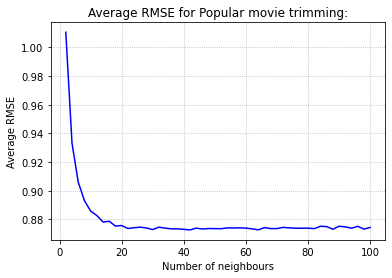

In [113]:
plt.plot(k,rmse_pop,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE for Popular movie trimming:')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q6a.png',dpi=300,bbox_inches='tight')
plt.show()

In [114]:
print("Minimum average RMSE for Popular movie trimming:", min(rmse_pop), ((rmse_pop. index(min(rmse_pop)))+1)*2)
minimum_index= ((rmse_pop. index(min(rmse_pop)))+1)*2
print(minimum_index)

Minimum average RMSE for Popular movie trimming: 0.8726364257179211 42
42


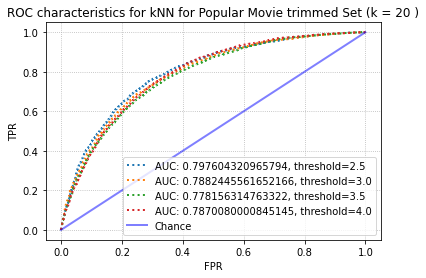

In [234]:

k = 20   # eyeballed this value as it stabilises from here
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
trim_list = []
trimmed_set= pop_trim(ratings_dataset,testset)
# unique, counts = np.unique([row[1] for row in testset], return_counts=True)
# for i in range(len(counts)):
#     if(counts[i]<=2):
#         trim_list.append(unique[i])
# trimmed_set = [j for j in testset if j[1] not in trim_list]
res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)

fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='-', lw=2, color='b', label='Chance', alpha=0.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for kNN for Popular Movie trimmed Set (k = 20 )')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q6a1.png',dpi=300,bbox_inches='tight')
plt.show() 

## For unpopular movie trim set

In [118]:
rmse_unpop = []
kf =  KFold(n_splits=10)
k = np.arange(2,102,2)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set= unpop_trim(ratings_dataset,testset)
#         trim_list = []
#         unique, counts = np.unique([row[1] for row in testset], return_counts=True)
#         for i in range(len(counts)):
#             if(counts[i]>2):
#                 trim_list.append(unique[i])
#         trimmed_set = [j for j in testset if j[1] not in trim_list]

        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


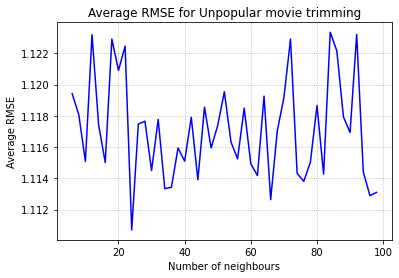

In [119]:
plt.plot(k[2:-1],rmse_unpop[2:-1],linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE for Unpopular movie trimming')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q6b.png',dpi=300,bbox_inches='tight')
plt.show()

In [120]:
print("Minimum average RMSE for Unpopular movie trimming:", min(rmse_unpop), ((rmse_unpop. index(min(rmse_unpop)))+1)*2)
minimum_index= ((rmse_unpop. index(min(rmse_unpop)))+1)*2
print(minimum_index)

Minimum average RMSE for Unpopular movie trimming: 1.110693050525033 24
24


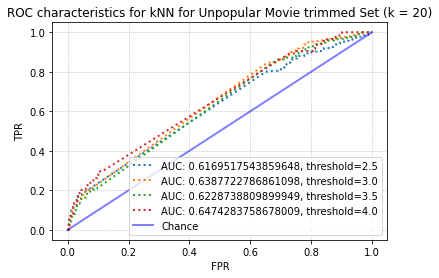

In [249]:

k = 20  # apply minimum k value from above here
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
# trim_list = []
# unique, counts = np.unique([row[1] for row in testset], return_counts=True)
# for i in range(len(counts)):
#     if(counts[i]>2):
#         trim_list.append(unique[i])
# trimmed_set = [j for j in testset if j[1] not in trim_list]
trimmed_set= unpop_trim(ratings_dataset,testset)
res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)

fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='-', lw=2, color='b', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for kNN for Unpopular Movie trimmed Set (k = {})'.format(k))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q6b1.png',dpi=300,bbox_inches='tight')
plt.show() 

## For high variance movie trim set

In [124]:
rmse_var = []
k = np.arange(2,102,2)
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set= highvar_trim(ratings_dataset,testset)
#         trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]

        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


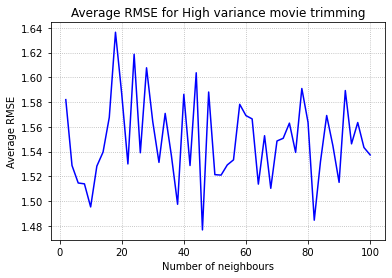

In [125]:
plt.plot(k,rmse_var,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE for High variance movie trimming')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q6c.png',dpi=300,bbox_inches='tight')
plt.show()

In [126]:
print("Minimum average RMSE for High variance movie trimming:", min(rmse_var), ((rmse_var. index(min(rmse_var)))+1)*2)
minimum_index= ((rmse_var. index(min(rmse_var)))+1)*2
print(minimum_index)

Minimum average RMSE for High variance movie trimming: 1.4766749201286182 46
46


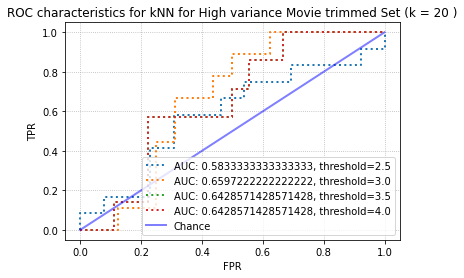

In [245]:

k = 20   # apply minimum k value from above here
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
trimmed_set= highvar_trim(ratings_dataset,testset)
res = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)

fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='-', lw=2, color='b', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for kNN for High variance Movie trimmed Set (k = {} )'.format(k))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q6c1.png',dpi=300,bbox_inches='tight')
plt.show() 

#Q8

8A

In [128]:
k = np.arange(2,52,2)
rmse_NMF = []
mae_NMF = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(NMF(n_factors=item,n_epochs=50,verbose=False),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10)   
    rmse_NMF.append(np.mean(res['test_rmse']))
    mae_NMF.append(np.mean(res['test_mae']))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


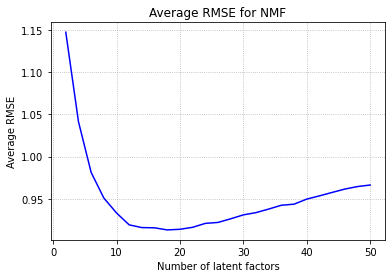

In [129]:
plt.plot(k,rmse_NMF,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE for NMF')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q8a.png',dpi=300,bbox_inches='tight')
plt.show()

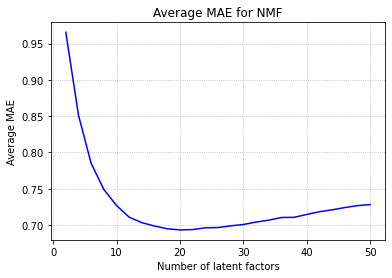

In [130]:
plt.plot(k,mae_NMF,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average MAE for NMF')
plt.ylabel('Average MAE')
plt.xlabel('Number of latent factors')
plt.savefig('Q8b.png',dpi=300,bbox_inches='tight')
plt.show()

8B

In [131]:
print("Minimum average RMSE (NMF): %f, value of k: %d" % (min(rmse_NMF),k[[i for i, x in enumerate(rmse_NMF) if x == min(rmse_NMF)][0]]))
print("Minimum average MAE (NMF): %f, value of k: %d" % (min(mae_NMF),k[[i for i, x in enumerate(mae_NMF) if x == min(mae_NMF)][0]]))

Minimum average RMSE (NMF): 0.913044, value of k: 18
Minimum average MAE (NMF): 0.693188, value of k: 20


8C

Popular

In [132]:
rmse_NMF_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set= pop_trim(ratings_dataset,testset)
#         trim_list = []
#         unique, counts = np.unique([row[1] for row in testset], return_counts=True)
#         for i in range(len(counts)):
#             if(counts[i]<=2):
#                 trim_list.append(unique[i])
#         trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_pop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


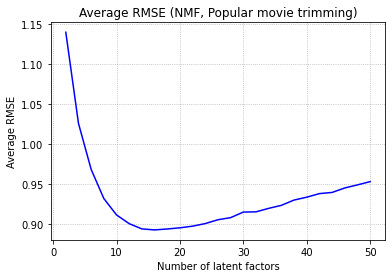

In [133]:
plt.plot(k,rmse_NMF_pop,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE (NMF, Popular movie trimming)')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q8_pop.png',dpi=300,bbox_inches='tight')
plt.show()

In [134]:
print("Minimum average RMSE (NMF, Popular movie trimming):", min(rmse_NMF_pop))

Minimum average RMSE (NMF, Popular movie trimming): 0.8924098822897882


Unpopular

In [135]:
rmse_NMF_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set= unpop_trim(ratings_dataset,testset)
#         trim_list = []
#         unique, counts = np.unique([row[1] for row in testset], return_counts=True)
#         for i in range(len(counts)):
#             if(counts[i]>2):
#                 trim_list.append(unique[i])
#         trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


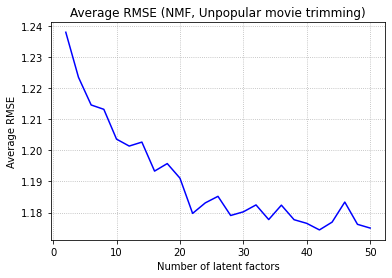

In [136]:
plt.plot(k,rmse_NMF_unpop,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE (NMF, Unpopular movie trimming)')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q8_unpop.png',dpi=300,bbox_inches='tight')
plt.show()

In [137]:
print("Minimum avg. RMSE (NMF, Unpopular movie trimming):", min(rmse_NMF_unpop))

Minimum avg. RMSE (NMF, Unpopular movie trimming): 1.1744519194634182


High Variance

In [138]:
rmse_NMF_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set= highvar_trim(ratings_dataset,testset)
#         trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


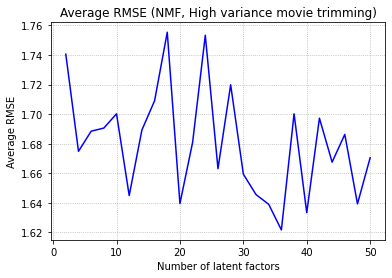

In [139]:
plt.plot(k,rmse_NMF_var,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE (NMF, High variance movie trimming)')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q8_high_var.png',dpi=300,bbox_inches='tight')
plt.show()

In [140]:
print("Minimum avg. RMSE (NMF, High variance movie trimming):", min(rmse_NMF_var))

Minimum avg. RMSE (NMF, High variance movie trimming): 1.6216558072920477


8D

In [141]:
k = k[[i for i, x in enumerate(rmse_NMF) if x == min(rmse_NMF)][0]]
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = NMF(n_factors=k,n_epochs=50,verbose=False).fit(trainset).test(testset)

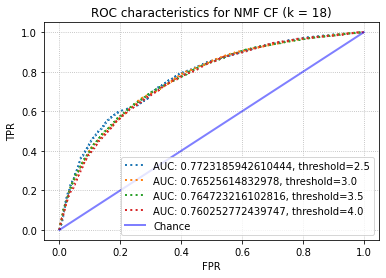

In [142]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='-', lw=2, color='b', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for NMF CF (k = {})'.format(k))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q8D.png',dpi=300,bbox_inches='tight')
plt.show() 

#Q9

In [143]:
genre = pd.read_csv(dataset_folder+'movies.csv',usecols=['movieId','title','genres'])
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
nmf = NMF(n_factors=20,n_epochs=50,verbose=False)
nmf.fit(trainset).test(testset)
U = nmf.pu
V = nmf.qi

In [144]:
cols = [1,3,5,7,11,15,19]
for item in cols:
    print('Column number of V: ',item)
    selected_col = V[:,item]
    sorted_col = np.argsort(selected_col)[::-1]
    for i in sorted_col[0:10]:
        print(genre['genres'][i])
    print('---------------------------------------------')

Column number of V:  1
Comedy|Drama|Sci-Fi|War
Drama
Drama|Mystery|Thriller
Comedy|Romance
Action|Comedy
Adventure|Animation|Children|Drama|Fantasy
Drama|Romance
Crime|Drama|Thriller
Adventure|Comedy
Comedy|Drama|Romance
---------------------------------------------
Column number of V:  3
Comedy|Musical|Romance
Drama
Action|Adventure|Drama|Western
Drama
Comedy
Comedy|Crime|Drama|Mystery|Romance
Comedy|Romance
Comedy|Horror|Thriller
Horror|Sci-Fi|Thriller
Drama
---------------------------------------------
Column number of V:  5
Action|Crime|Thriller
Comedy
Comedy|Drama|Romance
Adventure|Children|Drama
Adventure|Animation|Children|Drama|Fantasy
Children|Comedy|Drama
Crime|Drama|Mystery|Thriller
Comedy|Drama
Animation|Children|Comedy|Drama
Drama
---------------------------------------------
Column number of V:  7
Romance|Western
Drama
Action|Adventure|Sci-Fi|Thriller
Action|Drama
Comedy|Romance
Comedy|Fantasy|Romance
Action|Romance
Comedy|Romance
Action|Comedy|Crime
Action|Adventure|Fant

#Q10

10a

In [145]:
k = np.arange(2,52,2)
rmse_SVD = []
mae_SVD = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(SVD(n_factors=item,n_epochs=20,verbose=False),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10)   
    rmse_SVD.append(np.mean(res['test_rmse']))
    mae_SVD.append(np.mean(res['test_mae']))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


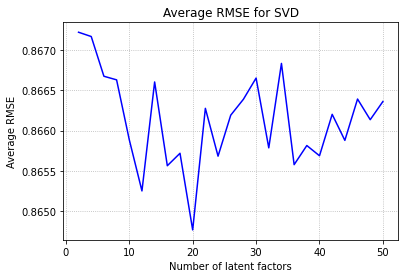

In [146]:
plt.plot(k,rmse_SVD,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE for MF with bias')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q10a_rmse.png',dpi=300,bbox_inches='tight')
plt.show()

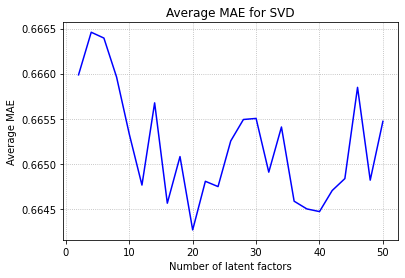

In [147]:
plt.plot(k,mae_SVD,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average MAE for MF with bias')
plt.ylabel('Average MAE')
plt.xlabel('Number of latent factors')
plt.savefig('Q10a_mae.png',dpi=300,bbox_inches='tight')
plt.show()

10b

In [148]:
print("Minimum avg. RMSE (SVD): %f, value of k: %d" % (min(rmse_SVD),k[[i for i, x in enumerate(rmse_SVD) if x == min(rmse_SVD)][0]]))
print("Minimum avg. MAE (SVD): %f, value of k: %d" % (min(mae_SVD),k[[i for i, x in enumerate(mae_SVD) if x == min(mae_SVD)][0]]))

Minimum avg. RMSE (SVD): 0.864768, value of k: 20
Minimum avg. MAE (SVD): 0.664265, value of k: 20


10c

popular 

In [223]:
k = np.arange(2,52,2)
rmse_SVD_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set= pop_trim(ratings_dataset,testset)
#         trim_list = []
#         unique, counts = np.unique([row[1] for row in testset], return_counts=True)
#         for i in range(len(counts)):
#             if(counts[i]<=2):
#                 trim_list.append(unique[i])
#         trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_pop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


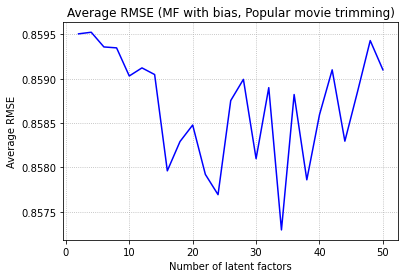

In [224]:
plt.plot(k,rmse_SVD_pop,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE (MF with bias, Popular movie trimming)')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q10c_popular.png',dpi=300,bbox_inches='tight')
plt.show()

In [225]:
print("Minimum avg. RMSE (SVD, Popular movie trimming):", min(rmse_SVD_pop))

Minimum avg. RMSE (SVD, Popular movie trimming): 0.8572953241054562


Unpopular

In [226]:
rmse_SVD_unpop = []
k = np.arange(2,52,2)
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set= unpop_trim(ratings_dataset,testset)
#         trim_list = []
#         unique, counts = np.unique([row[1] for row in testset], return_counts=True)
#         for i in range(len(counts)):
#             if(counts[i]>2):
#                 trim_list.append(unique[i])
#         trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


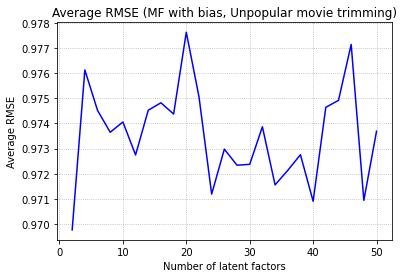

In [227]:
plt.plot(k,rmse_SVD_unpop,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE (MF with bias, Unpopular movie trimming)')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q10c_unpopular.png',dpi=300,bbox_inches='tight')
plt.show()

In [228]:
print("Minimum avg. RMSE (SVD, Unpopular movie trimming):", min(rmse_SVD_unpop))

Minimum avg. RMSE (SVD, Unpopular movie trimming): 0.9697667502387735


High Variance

In [229]:
rmse_SVD_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set= highvar_trim(ratings_dataset,testset)
#         trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


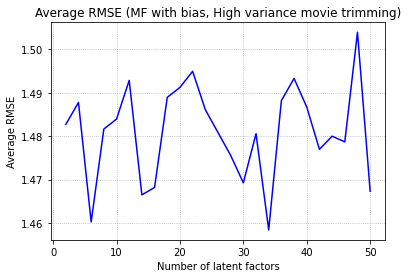

In [230]:
plt.plot(k,rmse_SVD_var,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Average RMSE (MF with bias, High variance movie trimming)')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q10c_high_var.png',dpi=300,bbox_inches='tight')
plt.show()

In [231]:
print("Minimum avg. RMSE (SVD, High variance movie trimming):", min(rmse_SVD_var))

Minimum avg. RMSE (SVD, High variance movie trimming): 1.4584067182387968


10d

In [232]:
k = k[[i for i, x in enumerate(rmse_SVD) if x == min(rmse_SVD)][0]]
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = SVD(n_factors=k,n_epochs=20,verbose=False).fit(trainset).test(testset)

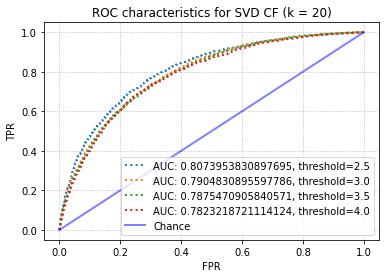

In [233]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='-', lw=2, color='b', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for SVD CF (k = '+ str(k)+')')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q10d.png',dpi=300,bbox_inches='tight')
plt.show()

## Q11

In [160]:
# naive collaborative filtering

In [161]:
user_ID_set = list(set(user_ID))
mean_ratings = []
for user in user_ID_set:
    idx = np.where(user_ID == user)
    mean_ratings.append(np.mean(rating[idx]))

In [162]:
kf = KFold(n_splits=10)
local_rmse = []
for trainset, testset in kf.split(ratings_dataset):
    res = [mean_ratings[int(row[0])-1] for row in testset]
    gt = [row[2] for row in testset]
    local_rmse.append(mean_squared_error(gt,res,squared=False))
rmse_naive = np.mean(local_rmse)

In [163]:
print('Average RMSE for Naive Filtering: ',rmse_naive)

Average RMSE for Naive Filtering:  0.9347140178664846


## naive collaborative filtering on popular movie test set

In [164]:
local_rmse_naive_pop = []
kf =  KFold(n_splits=10)
for trainset, testset in kf.split(ratings_dataset):
    trimmed_set= pop_trim(ratings_dataset,testset)
#     trim_list = []
#     unique, counts = np.unique([row[1] for row in testset], return_counts=True)
#     for i in range(len(counts)):
#         if(counts[i]<=2):
#             trim_list.append(unique[i])
#     trimmed_set = [j for j in testset if j[1] not in trim_list]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_pop.append(mean_squared_error(gt,res,squared=False))
rmse_naive_pop = np.mean(local_rmse_naive_pop)

In [165]:
print('Average RMSE for Naive Filtering with Popular movie trimming: ',rmse_naive_pop)

Average RMSE for Naive Filtering with Popular movie trimming:  0.9323203548911273


## naive collaborative filtering on unpopular movie test set 

In [166]:
local_rmse_naive_unpop = []
kf =  KFold(n_splits=10)
for trainset, testset in kf.split(ratings_dataset):
    trimmed_set= unpop_trim(ratings_dataset,testset)
#     trim_list = []
#     unique, counts = np.unique([row[1] for row in testset], return_counts=True)
#     for i in range(len(counts)):
#         if(counts[i]>2):
#             trim_list.append(unique[i])
#     trimmed_set = [j for j in testset if j[1] not in trim_list]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_unpop.append(mean_squared_error(gt,res,squared=False))
rmse_naive_unpop = np.mean(local_rmse_naive_unpop)

In [167]:
print('Average RMSE for Naive Filtering with Unpopular movie trimming: ',rmse_naive_unpop)

Average RMSE for Naive Filtering with Unpopular movie trimming:  0.9713050454710471


## naive collaborative filtering on high variance movie test set

In [168]:
local_rmse_naive_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for trainset, testset in kf.split(ratings_dataset):
    trimmed_set= highvar_trim(ratings_dataset,testset)
#     trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_var.append(mean_squared_error(gt,res,squared=False))
rmse_naive_var = np.mean(local_rmse_naive_var)

In [169]:
print('Average RMSE for Naive Filtering with High Variance movie trimming: ',rmse_naive_var)

Average RMSE for Naive Filtering with High Variance movie trimming:  1.4532892979848007


#Q12

In [213]:
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res_SVD  = SVD(n_factors=20,n_epochs=20,verbose=False).fit(trainset).test(testset)
res_NMF  = NMF(n_factors=18,n_epochs=50,verbose=False).fit(trainset).test(testset)
res_KNN = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

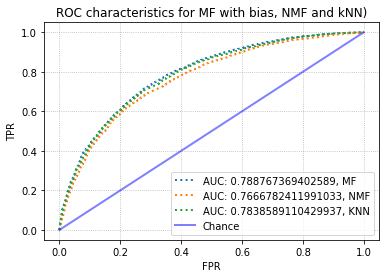

In [214]:
fig, ax = plt.subplots()
thresholded_out = []
for row in res_SVD:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_SVD])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', MF')  

thresholded_out = []
for row in res_NMF:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_NMF])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', NMF')  

thresholded_out = []
for row in res_KNN:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_KNN])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', KNN')  

ax.plot([0, 1], [0, 1], linestyle='-', lw=2, color='b', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for MF with bias, NMF and kNN)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q12.png',dpi=300,bbox_inches='tight')
plt.show()

#Q14

k-NN

In [172]:
t = np.arange(1,26,1)
kf = KFold(n_splits=10)

In [173]:
prec_list_knn = []
rec_list_knn = []
for val in t:
    print('Testing for t =',val)
    precision_set = []
    recall_set = []
    for trainset, testset in kf.split(ratings_dataset):
        G = {} #dictionary of movies liked by users
        for row in testset:
            if row[0] in G.keys():
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])
            else:
                G[row[0]] = set()
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])    
        dict_of_items = {} #dictionary of all movies rated by users
        for row in testset:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        mod_testset = [row for row in testset if (len(dict_of_items[row[0]]) >= val and len(G[row[0]]) > 0)]
        res = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(mod_testset)
        est_rat = {} #dictionary of estimated ratings by users
        for row in res:
            if row[0] in est_rat.keys():
                est_rat[row[0]].append((row[1],row[3]))
            else:
                est_rat[row[0]] = []
                est_rat[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in est_rat.keys():
            S_all = est_rat[item]
            S_all = sorted(S_all,key=lambda x:x[1],reverse=True)
            S_t = set([row[0] for row in S_all[0:val]])
            precision_u.append(len(S_t.intersection(G[item]))/float(len(S_t)))
            recall_u.append(len(S_t.intersection(G[item]))/float(len(G[item])))
        precision_set.append(np.mean(precision_u))
        recall_set.append(np.mean(recall_u))
    prec_list_knn.append(np.mean(precision_set))
    rec_list_knn.append(np.mean(recall_set))

Testing for t = 1
Testing for t = 2
Testing for t = 3
Testing for t = 4
Testing for t = 5
Testing for t = 6
Testing for t = 7
Testing for t = 8
Testing for t = 9
Testing for t = 10
Testing for t = 11
Testing for t = 12
Testing for t = 13
Testing for t = 14
Testing for t = 15
Testing for t = 16
Testing for t = 17
Testing for t = 18
Testing for t = 19
Testing for t = 20
Testing for t = 21
Testing for t = 22
Testing for t = 23
Testing for t = 24
Testing for t = 25


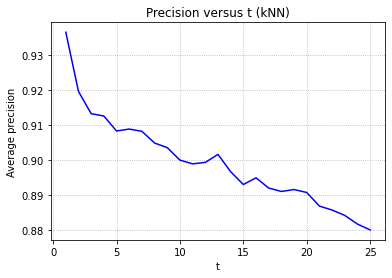

In [174]:
plt.plot(t,prec_list_knn,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Precision versus t (kNN)')
plt.ylabel('Average precision')
plt.xlabel('t')
plt.savefig('Q14_svda.png',dpi=300,bbox_inches='tight')
plt.show()

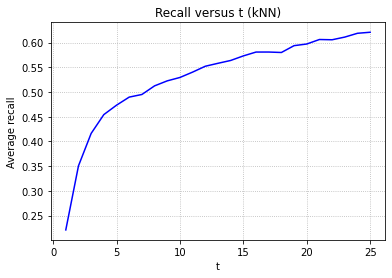

In [175]:
plt.plot(t,rec_list_knn,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Recall versus t (kNN)')
plt.ylabel('Average recall')
plt.xlabel('t')
plt.savefig('Q14_svdb.png',dpi=300,bbox_inches='tight')
plt.show()

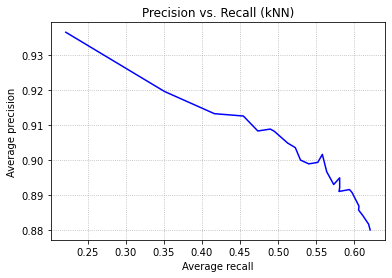

In [176]:
plt.plot(rec_list_knn,prec_list_knn,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (kNN)')
plt.ylabel('Average precision')
plt.xlabel('Average recall')
plt.savefig('Q14_svdc.png',dpi=300,bbox_inches='tight')
plt.show()

NNMF

In [177]:
t = np.arange(1,26,1)
kf = KFold(n_splits=10)

In [178]:
#k=18
prec_list_nmf = []
rec_list_nmf = []
for val in t:
    print('Testing for t =',val)
    precision_set = []
    recall_set = []
    for trainset, testset in kf.split(ratings_dataset):
        G = {} #dictionary of movies liked by users
        for row in testset:
            if row[0] in G.keys():
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])
            else:
                G[row[0]] = set()
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])    
        dict_of_items = {} #dictionary of all movies rated by users
        for row in testset:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        mod_testset = [row for row in testset if (len(dict_of_items[row[0]]) >= val and len(G[row[0]]) > 0)]
        res = NMF(n_factors=18,n_epochs=50,verbose=False).fit(trainset).test(mod_testset)
        est_rat = {} #dictionary of estimated ratings by users
        for row in res:
            if row[0] in est_rat.keys():
                est_rat[row[0]].append((row[1],row[3]))
            else:
                est_rat[row[0]] = []
                est_rat[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in est_rat.keys():
            S_all = est_rat[item]
            S_all = sorted(S_all,key=lambda x:x[1],reverse=True)
            S_t = set([row[0] for row in S_all[0:val]])
            precision_u.append(len(S_t.intersection(G[item]))/float(len(S_t)))
            recall_u.append(len(S_t.intersection(G[item]))/float(len(G[item])))
        precision_set.append(np.mean(precision_u))
        recall_set.append(np.mean(recall_u))
    prec_list_nmf.append(np.mean(precision_set))
    rec_list_nmf.append(np.mean(recall_set))

Testing for t = 1
Testing for t = 2
Testing for t = 3
Testing for t = 4
Testing for t = 5
Testing for t = 6
Testing for t = 7
Testing for t = 8
Testing for t = 9
Testing for t = 10
Testing for t = 11
Testing for t = 12
Testing for t = 13
Testing for t = 14
Testing for t = 15
Testing for t = 16
Testing for t = 17
Testing for t = 18
Testing for t = 19
Testing for t = 20
Testing for t = 21
Testing for t = 22
Testing for t = 23
Testing for t = 24
Testing for t = 25


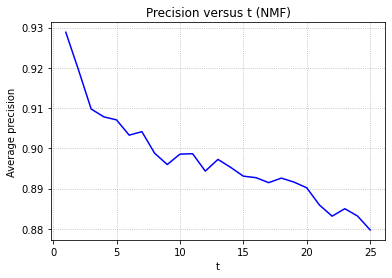

In [179]:
plt.plot(t,prec_list_nmf,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Precision versus t (NMF)')
plt.ylabel('Average precision')
plt.xlabel('t')
plt.savefig('Q14_nmfa.png',dpi=300,bbox_inches='tight')
plt.show()

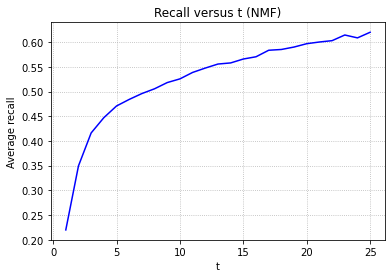

In [180]:
plt.plot(t,rec_list_nmf,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Recall versus t (NMF)')
plt.ylabel('Average recall')
plt.xlabel('t')
plt.savefig('Q14_nmfb.png',dpi=300,bbox_inches='tight')
plt.show()

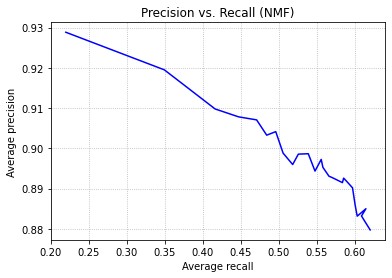

In [181]:
plt.plot(rec_list_nmf,prec_list_nmf,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (NMF)')
plt.ylabel('Average precision')
plt.xlabel('Average recall')
plt.savefig('Q14_nmfc.png',dpi=300,bbox_inches='tight')
plt.show()

MF

In [182]:
t = np.arange(1,26,1)
kf = KFold(n_splits=10)

In [215]:
prec_list_svd = []
rec_list_svd = []
for val in t:
    print('Testing for t =',val)
    precision_set = []
    recall_set = []
    for trainset, testset in kf.split(ratings_dataset):
        G = {} #dictionary of movies liked by users
        for row in testset:
            if row[0] in G.keys():
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])
            else:
                G[row[0]] = set()
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])    
        dict_of_items = {} #dictionary of all movies rated by users
        for row in testset:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        mod_testset = [row for row in testset if (len(dict_of_items[row[0]]) >= val and len(G[row[0]]) > 0)]
        res = SVD(n_factors=20,n_epochs=20,verbose=False).fit(trainset).test(mod_testset)
        est_rat = {} #dictionary of estimated ratings by users
        for row in res:
            if row[0] in est_rat.keys():
                est_rat[row[0]].append((row[1],row[3]))
            else:
                est_rat[row[0]] = []
                est_rat[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in est_rat.keys():
            S_all = est_rat[item]
            S_all = sorted(S_all,key=lambda x:x[1],reverse=True)
            S_t = set([row[0] for row in S_all[0:val]])
            precision_u.append(len(S_t.intersection(G[item]))/float(len(S_t)))
            recall_u.append(len(S_t.intersection(G[item]))/float(len(G[item])))
        precision_set.append(np.mean(precision_u))
        recall_set.append(np.mean(recall_u))
    prec_list_svd.append(np.mean(precision_set))
    rec_list_svd.append(np.mean(recall_set))

Testing for t = 1
Testing for t = 2
Testing for t = 3
Testing for t = 4
Testing for t = 5
Testing for t = 6
Testing for t = 7
Testing for t = 8
Testing for t = 9
Testing for t = 10
Testing for t = 11
Testing for t = 12
Testing for t = 13
Testing for t = 14
Testing for t = 15
Testing for t = 16
Testing for t = 17
Testing for t = 18
Testing for t = 19
Testing for t = 20
Testing for t = 21
Testing for t = 22
Testing for t = 23
Testing for t = 24
Testing for t = 25


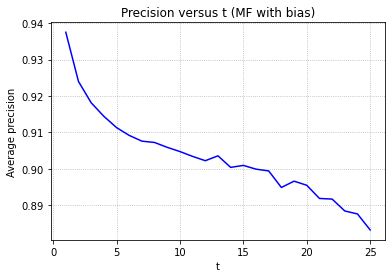

In [216]:
plt.plot(t,prec_list_svd,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Precision versus t (MF with bias)')
plt.ylabel('Average precision')
plt.xlabel('t')
plt.savefig('Q14mfa.png',dpi=300,bbox_inches='tight')
plt.show()

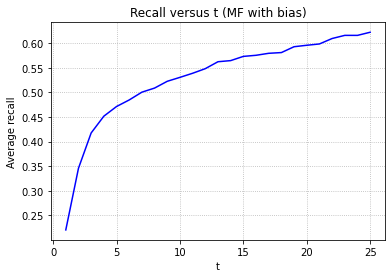

In [217]:
plt.plot(t,rec_list_svd,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Recall versus t (MF with bias)')
plt.ylabel('Average recall')
plt.xlabel('t')
plt.savefig('Q14mfb.png',dpi=300,bbox_inches='tight')
plt.show()

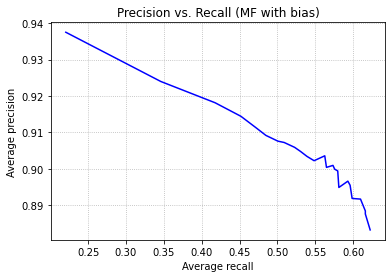

In [218]:
plt.plot(rec_list_svd,prec_list_svd,linestyle='-',color='b')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (MF with bias)')
plt.ylabel('Average precision')
plt.xlabel('Average recall')
plt.savefig('Q14mfc.png',dpi=300,bbox_inches='tight')
plt.show()

14b

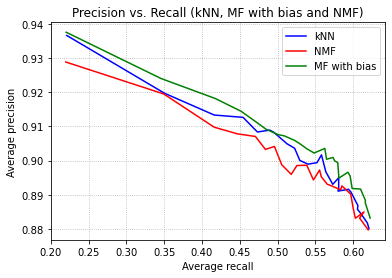

In [219]:
fig, ax = plt.subplots()
ax.plot(rec_list_knn,prec_list_knn,linestyle='-',color='b',label='kNN')
ax.plot(rec_list_nmf,prec_list_nmf,linestyle='-',color='r',label='NMF')
ax.plot(rec_list_svd,prec_list_svd,linestyle='-',color='g',label='MF with bias')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (kNN, MF with bias and NMF)')
plt.ylabel('Average precision')
plt.xlabel('Average recall')
plt.legend(loc="best")
plt.savefig('Q14b.png',dpi=300,bbox_inches='tight')
plt.show()